# Practice Lab :
#### Name:- Sruthi Nayagi 
#### Reg.no:- 19BAI1037 
#### Subject:- Computer Vision in Healthcare Application (CSE4038) 
#### Faculty-In-Charge:- Dr.BALASUNDARAM A
#### Lab Slot:- L27+L28 
#### Date of Examination:- 22/04/2022
#### Dataset Used:- Chest_xrays

`Done in Jupyter Notebook`

Note
1. dataset will be available

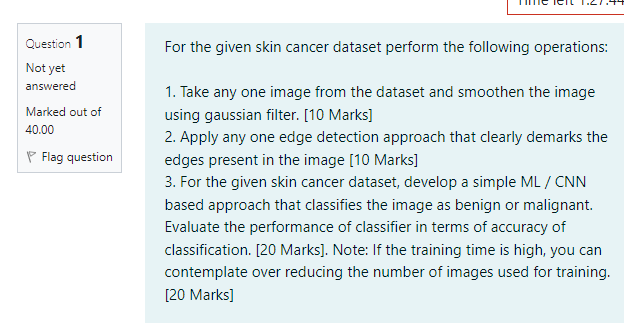

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pylab
from scipy import ndimage
from skimage.util import random_noise

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [30]:
image = cv2.imread(r"C:\Users\student\Desktop\19bai1037_CV Practice Lab\train\benign\3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (256, 256))

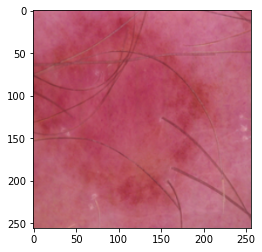

In [31]:
plt.imshow(image,cmap='gray', vmin=0, vmax=255)

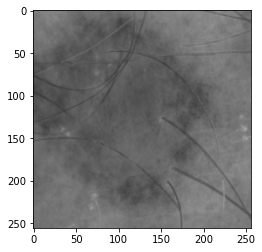

In [35]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.png',gray_image)
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255) 

# Gaussian Smoothening

In [37]:
def gaussian():
    image = cv2.imread('gray_image.png')
    cv2.getGaussianKernel(9,9)
    blur= cv2.GaussianBlur(image,(5,5),0)
    cv2.imwrite('blur.png',blur)
    plt.subplot(121),plt.imshow(image),plt.title('original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(blur),plt.title('blur')
    plt.xticks([]), plt.yticks([])
    plt.show()
    cv2.imwrite('gaussianBlur.png',blur)

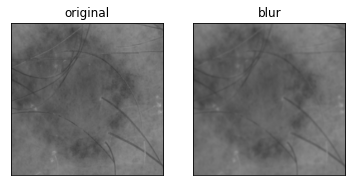

In [38]:
gaussian()

# Edge detection 
### Sobel Edge detector

In [40]:
blur= cv2.GaussianBlur(image,(5,5),0)

In [41]:
sobelx = cv2.Sobel(src=blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge
sobely = cv2.Sobel(src=blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge
sobelxy = cv2.Sobel(src=blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X

In [42]:
titles = ['Sobel X','Sobel Y','Sobel XY']
images = [sobelx,sobely,sobelxy]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


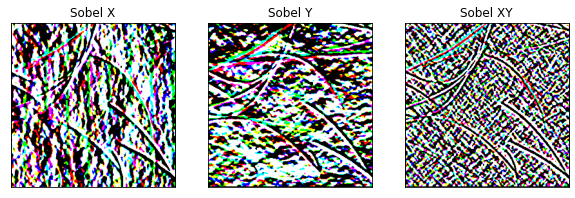

In [43]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Image Classfication using ML/CNN
## CNN architecture

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [50]:
classifier= Sequential() 
classifier.add(Convolution2D(filters=32, kernel_size=(3,3),input_shape=(64, 64, 3),kernel_initializer='he_uniform', activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), kernel_initializer='he_uniform',activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128,kernel_initializer='glorot_uniform', activation='relu')) 
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [51]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [56]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [57]:
training_set= train_datagen.flow_from_directory(directory= r"C:\Users\student\Desktop\19bai1037_CV Practice Lab\train/",
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=128,
                                               class_mode='binary' # for 2 class binary 
                                               )

Found 2637 images belonging to 2 classes.


In [58]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [59]:
test_set= test_datagen.flow_from_directory(directory= r"C:\Users\student\Desktop\19bai1037_CV Practice Lab\test/",
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=128,
                                               class_mode='binary' # for 2 class binary
                                          )

Found 660 images belonging to 2 classes.


In [60]:
history=classifier.fit(training_set,
                        batch_size=128,# Data in training set
                        epochs=10,
                        verbose=1, 
                        validation_data=test_set, 
                        validation_steps=624 # no of data point for validation
                        )

Epoch 1/10
21/21 [==============================] - 36s 2s/step - loss: 0.8937 - accuracy: 0.5935 - val_loss: 0.5477 - val_accuracy: 0.7500
Epoch 2/10
21/21 [==============================] - 19s 905ms/step - loss: 0.4962 - accuracy: 0.7543
Epoch 3/10
21/21 [==============================] - 10s 486ms/step - loss: 0.4432 - accuracy: 0.7888
Epoch 4/10
21/21 [==============================] - 10s 462ms/step - loss: 0.4338 - accuracy: 0.7827
Epoch 5/10
21/21 [==============================] - 10s 486ms/step - loss: 0.4022 - accuracy: 0.8036
Epoch 6/10
21/21 [==============================] - 10s 458ms/step - loss: 0.3885 - accuracy: 0.8123
Epoch 7/10
21/21 [==============================] - 10s 489ms/step - loss: 0.3904 - accuracy: 0.8043
Epoch 8/10
21/21 [==============================] - 11s 511ms/step - loss: 0.3780 - accuracy: 0.8240
Epoch 9/10
21/21 [==============================] - 10s 466ms/step - loss: 0.4022 - accuracy: 0.8043
Epoch 10/10
21/21 [==============================] -

In [61]:
score = classifier.evaluate(test_set, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.36396366357803345
Test accuracy: 0.821212112903595


In [63]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\student\Desktop\19bai1037_CV Practice Lab\test\malignant\81.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'BENIGN'
else:
    prediction = 'MALIGNANT'
print("Th given image is predicted as:",prediction)

Th given image is predicted as: BENIGN
